### Student Information
Name: 張誠晉

Student ID: 0612247

GitHub ID: immersec

Kaggle name: ChenChinChang

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

## 1.

In [1]:
# Begin Assignment Here
import pandas as pd

# training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

# testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

**Exercise 1**

<BarContainer object of 30 artists>

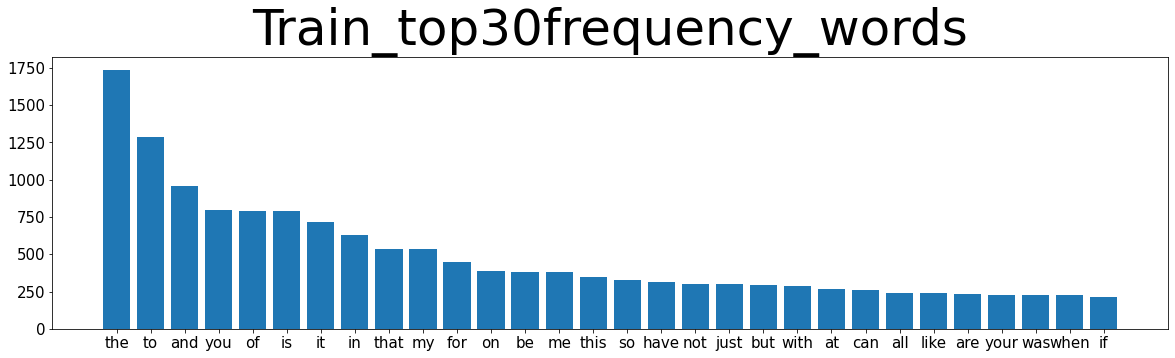

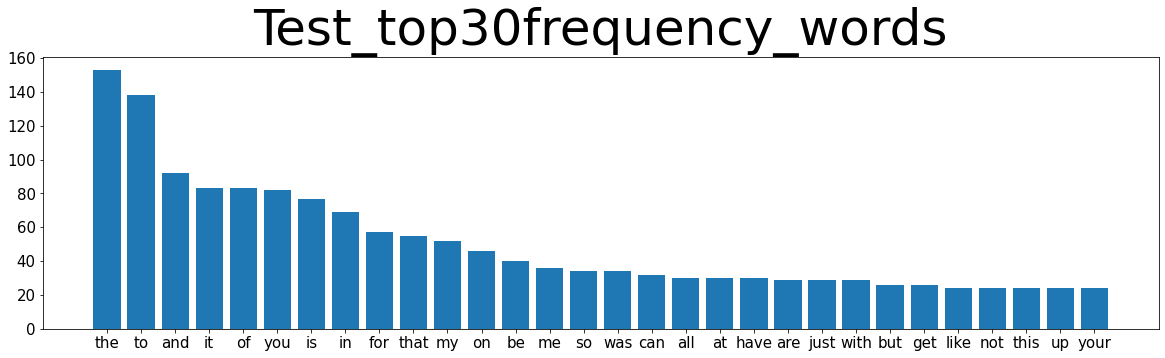

In [2]:
# Answer here
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt

#  scan all token out
train_df['words'] = train_df['text'].apply(lambda x: dmh.tokenize_text(x))
count_vect = CountVectorizer()
# generate document-term matrix
train_df_counts = count_vect.fit_transform(train_df.text)
train_df_term_frequencies = []
train_df_term_frequencies = np.asarray(train_df_counts.sum(axis=0))[0]

# we first zip the frequencies and features together to make sure it still matches to the right feature when we are sorting it.
zipped = zip(train_df_term_frequencies, count_vect.get_feature_names())
res = sorted(zipped, key = lambda x: x[0], reverse=True)
# then we take the result out and turn it back into a list
a, b = zip(*res)
a = list(a)
b = list(b)
plt.subplots(figsize=(20, 5))
# then plot the first 30 features with the highest frequency
plt.title("Train_top30frequency_words",fontsize = 50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.bar(b[:30],a[:30])

# do the same thins again on test data
#  scan all token out
test_df['words'] = test_df['text'].apply(lambda x: dmh.tokenize_text(x))
# generate document-term matrix
count_vect2 = CountVectorizer()
test_df_counts = count_vect2.fit_transform(test_df.text)
test_df_term_frequencies = []
test_df_term_frequencies = np.asarray(test_df_counts.sum(axis=0))[0]

# we first zip the frequencies and features together to make sure it still matches to the right feature when we are sorting it.
zipped = zip(test_df_term_frequencies, count_vect2.get_feature_names())
res = sorted(zipped, key = lambda x: x[0], reverse=True)
# then we take the result out and turn it back into a list
a, b = zip(*res)
a = list(a)
b = list(b)
plt.subplots(figsize=(20, 5))
# then plot the first 30 features with the highest frequency
plt.title("Test_top30frequency_words",fontsize = 50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.bar(b[:30],a[:30])


**Exercise 2**

In [3]:
# import TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# set max 1000 features
vectorizer = TfidfVectorizer(max_features=1000,)
# generate TF-IDF features
TFID = vectorizer.fit_transform(train_df['text'])
print(len(vectorizer.get_feature_names()))
print(vectorizer.get_feature_names()[100:110])

1000
['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody', 'blues', 'body', 'boiling']


**Exercise 3**

**The confusion matrix figure shows more detail to let us know things more about just accuracy.  
We can actually find out where our model make mistake through confusion matrix, since we can directly see those wrong prediction is what.  
For example, the model has predict anger for total 84 times, with 58 times correct, but other 16 times is actually fear, 6 times joy and 4 times sadness.  
As above shows, most wrong predictions of anger is fear, so we can guess there might be some ambiguous words that our model can't decide it is anger or fear, since fear is more indistinguishable from anger than joy and sadness do.**


**Exercise 4**

C:\Users\ccc87\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)
training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.64      0.67      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.77      0.70      0.73        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



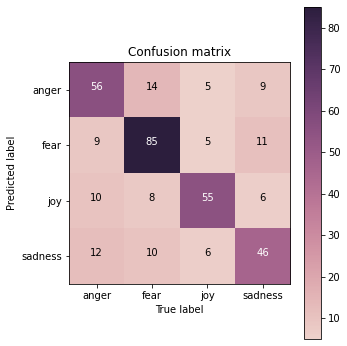

In [4]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, we provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

# check data dimension
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

# Answer here
# import naive bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
# start training
clf.fit(X_train, y_train)
# predict both train and test data
NB_train_pred = clf.predict(X_train)
NB_test_pred = clf.predict(X_test)

# check accuracy
from sklearn.metrics import accuracy_score
acc_NB_train = accuracy_score(y_true=y_train, y_pred=NB_train_pred)
acc_NB_test = accuracy_score(y_true=y_test, y_pred=NB_test_pred)
print('training accuracy: {}'.format(round(acc_NB_train, 2)))
print('testing accuracy: {}'.format(round(acc_NB_test, 2)))

# precision, recall, f1-score,
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=NB_test_pred))

# check by confusion matrix
from sklearn.metrics import confusion_matrix
figure1 = confusion_matrix(y_true=y_test, y_pred=NB_test_pred) 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()
    
# plot the figure out
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(figure1, classes=my_tags, title='Confusion matrix')


**Compare to DecisionTree model, Naive Bayes model has better accuracy on testing data, but worse on training data**

**Exercise 5**

**Decision tree perform better on training data but worse on testing data, apparently it must be overfitting.   
Since Naive Bayes is based on conditional probability, it has less probability to get overfitting than Decision trees.  
Also, Naive Bayes does not need much data, but decision trees do.    
In this case, data might not be large enough, so Naive Bayes performs better in this task.**

**Exercise 6**

In [5]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

# check dimension
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [6]:
# deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2383        joy
1487       fear
3332    sadness
3056    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [7]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

input_shape:  500
output_shape:  4
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)        

In [8]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# start training
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


C:\Users\ccc87\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 1s 4ms/step - loss: 1.3320 - accuracy: 0.3692 - val_loss: 1.2754 - val_accuracy: 0.4784
Epoch 2/25
113/113 [==============================] - 0s 3ms/step - loss: 1.0171 - accuracy: 0.6319 - val_loss: 0.9086 - val_accuracy: 0.6801
Epoch 3/25
113/113 [==============================] - 0s 3ms/step - loss: 0.6078 - accuracy: 0.7847 - val_loss: 0.7706 - val_accuracy: 0.6859
Epoch 4/25
113/113 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.8406 - val_loss: 0.8143 - val_accuracy: 0.6744
Epoch 5/25
113/113 [==============================] - 0s 3ms/step - loss: 0.3358 - accuracy: 0.8815 - val_loss: 0.8553 - val_accuracy: 0.6715
Epoch 6/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2761 - accuracy: 0.9017 - val_loss: 0.9217 - val_accuracy: 0.6859
Epoch 7/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2326 - accuracy: 0.9181 - val_loss: 0.9686 - val_accuracy: 0.6744
Epoch 8/25
113/11

In [9]:
# predict
pred_result = model.predict(X_test, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)
from sklearn.metrics import accuracy_score
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

testing accuracy: 0.67


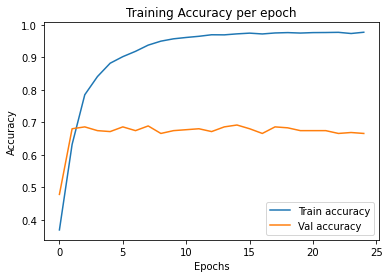

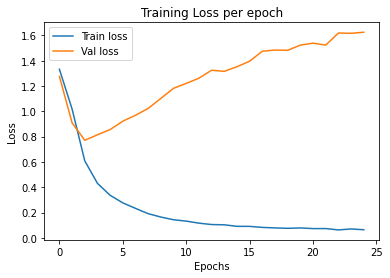

In [10]:
# Answer here
import matplotlib.pyplot as plt
# plot two lines
plt.plot(training_log['epoch'],training_log['accuracy'])
plt.plot(training_log['epoch'],training_log['val_accuracy'])
# set title, label and legend
plt.legend(['Train accuracy','Val accuracy'])
plt.title("Training Accuracy per epoch") 
plt.ylabel("Accuracy") 
plt.xlabel("Epochs")
plt.show()
# plot two lines
plt.plot(training_log['epoch'],training_log['loss'])
plt.plot(training_log['epoch'],training_log['val_loss'])
# set title, label and legend
plt.legend(['Train loss','Val loss'])
plt.title("Training Loss per epoch") 
plt.ylabel("Loss") 
plt.xlabel("Epochs")
plt.show()

**Exercise 7**

**We can turn every word in sentence into word vector, then sum them together and take average.  
Let this new vector become the input data**

In [11]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_iter)

example = "Today is a good day"
vector = []
for word in example.split():
    word_vec = word2vec_model.wv[word]
    vector.append(word_vec)

input_data = np.sum(vector, axis=0) / len(example.split())
print(input_data)

[ 0.01551151  0.8258997   0.2500945   0.27537456 -0.41769236 -1.1844416
  0.41386896  1.2472811  -0.62787026 -0.9039286  -0.16212617 -0.63314635
  0.25220358 -0.0409614   0.395201   -0.470028    0.5644642  -0.05864037
 -0.1173384  -1.0214928   0.0059192  -0.13075796  0.71608675 -0.42462382
 -0.39281183  0.4051014  -0.00376046  0.02700375 -0.34112617  0.22361895
  0.17305522 -0.31286317 -0.1014774  -0.8149471  -0.20772457  0.41606706
  0.2966514  -0.22166984 -0.5648297  -0.45044622 -0.14547226 -0.37132365
 -0.31403953  0.38709757  0.5732257  -0.40947312 -0.6092906   0.00588751
  0.30230626 -0.01503788  0.24721596 -0.26677853 -0.28138083 -0.12250473
 -0.9481514   0.44949204  0.26855737 -0.0677092  -0.37254348  0.38812882
  0.11716293 -0.12039314  0.27211255  0.2458541  -0.6131682   0.9011102
  0.21438956  0.7887805  -0.8235897   0.21053448 -0.11265433  0.09940933
  0.45446962 -0.05701668  0.6981608   0.80016744 -0.34566656  0.5155803
 -0.576079   -0.06139014 -0.77445364  0.14227349 -0.26

**Exercise 8**

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

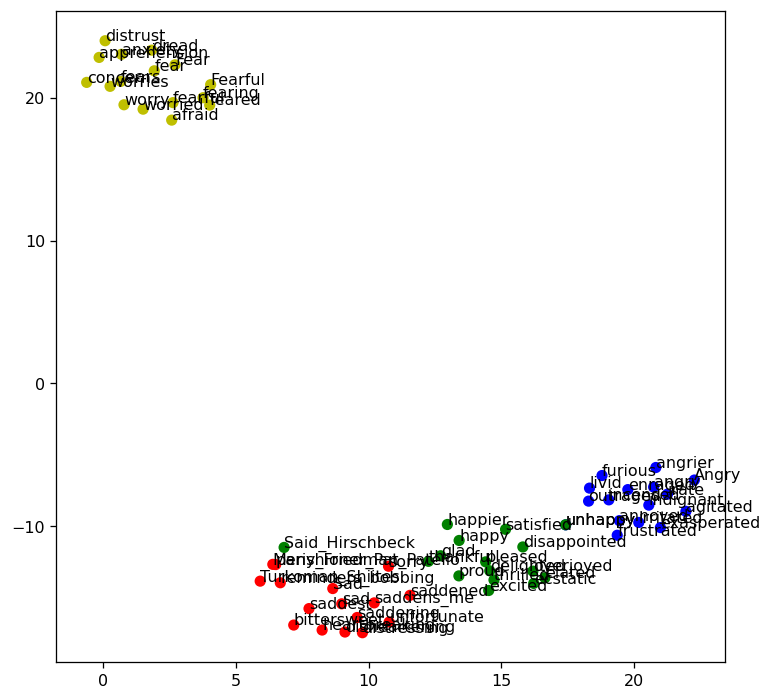

In [12]:
# Answer here
from gensim.models import KeyedVectors

# load w2v_google_model
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

word_list = ['angry', 'happy', 'sad', 'fear']

# set topn = 15
topn = 15
# repare data lists like adding top15 related words with angry into angry list
# do the same thing on each of them
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

# add all four lists together
target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

# set point color
print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# w2v model
model = w2v_google_model

# prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

# t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

# training
X_tsne = tsne.fit_transform(X_train)

# plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## 3.

**First, read the data**

In [13]:
import pandas as pd

df = pd.read_json("tweets_DM.json", lines=True)

In [14]:
emotion_data = pd.read_csv("emotion.csv")
ident_data = pd.read_csv("data_identification.csv")
source = pd.DataFrame(df._source)

In [15]:
# merge these data through full outer join way
source_list = source['_source'].to_list()
source_data = pd.DataFrame.from_records(source_list)
source_list = source_data['tweet'].to_list()
DF = pd.DataFrame.from_records(source_list)
data = pd.merge(DF, ident_data, how='outer', on='tweet_id').merge(emotion_data, how='outer', on='tweet_id')

In [16]:
# check the data
print(data.shape)
data[0:10]

(1867535, 5)


,hashtags,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,NaN
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN
5,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
6,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation
7,[],0x368e95,Love knows no gender. 😢😭 <LH>,train,joy
8,[LeagueCup],0x249c0c,@DStvNgCare @DStvNg More highlights are being ...,train,sadness
9,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,test,NaN


In [17]:
# turn the whole sentence into lower case for every text
def low(x):
    x = x.lower()
    return x

data['text'] = data['text'].apply(low)
data[0:10]

,hashtags,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"people who post ""add me on #snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas as we see, trump is dangerous to #...",train,sadness
2,[bibleverse],0x28b412,"confident of your obedience, i write to you, k...",test,NaN
3,[],0x1cd5b0,now issa is stalking tasha 😂😂😂 <lh>,train,fear
4,[],0x2de201,"""trust is not the same as faith. a friend is s...",test,NaN
5,"[authentic, LaughOutLoud]",0x1d755c,@riskshow @thekevinallison thx for the best ti...,train,joy
6,[],0x2c91a8,still waiting on those supplies liscus. <lh>,train,anticipation
7,[],0x368e95,love knows no gender. 😢😭 <lh>,train,joy
8,[LeagueCup],0x249c0c,@dstvngcare @dstvng more highlights are being ...,train,sadness
9,"[materialism, money, possessions]",0x218443,when do you have enough ? when are you satisfi...,test,NaN


In [18]:
# seperate train and test data
train_df = data[data['identification'] == 'train']
test_df = data[data['identification'] == 'test']

In [19]:
# check their size
print(train_df.shape[0])
print(test_df.shape[0])

1455563
411972


In [20]:
train_df

,hashtags,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"people who post ""add me on #snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas as we see, trump is dangerous to #...",train,sadness
3,[],0x1cd5b0,now issa is stalking tasha 😂😂😂 <lh>,train,fear
5,"[authentic, LaughOutLoud]",0x1d755c,@riskshow @thekevinallison thx for the best ti...,train,joy
6,[],0x2c91a8,still waiting on those supplies liscus. <lh>,train,anticipation
...,...,...,...,...,...
1867526,"[NoWonder, Happy]",0x321566,i'm so happy!!! #nowonder the name of this sho...,train,joy
1867527,[],0x38959e,in every circumtance i'd like to be thankful t...,train,joy
1867528,[blessyou],0x2cbca6,there's currently two girls walking around the...,train,joy
1867533,[],0x24faed,"ah, corporate life, where you can date <lh> us...",train,joy


In [21]:
test_df

,hashtags,tweet_id,text,identification,emotion
2,[bibleverse],0x28b412,"confident of your obedience, i write to you, k...",test,NaN
4,[],0x2de201,"""trust is not the same as faith. a friend is s...",test,NaN
9,"[materialism, money, possessions]",0x218443,when do you have enough ? when are you satisfi...,test,NaN
30,"[GodsPlan, GodsWork]",0x2939d5,"god woke you up, now chase the day #godsplan #...",test,NaN
33,[],0x26289a,"in these tough times, who do you turn to as yo...",test,NaN
...,...,...,...,...,...
1867525,[],0x2913b4,"""for this is the message that ye heard from th...",test,NaN
1867529,[],0x2a980e,"""there is a lad here, which hath five barley l...",test,NaN
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,when you buy the last 2 tickets remaining for ...,test,NaN
1867531,[],0x29d0cb,i swear all this hard work gone pay off one da...,test,NaN


In [22]:
# save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [23]:
# load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [24]:
# split part of indentified data into the validation set
train_df = train_df.sample(frac=1)
val = train_df[0:10000]
train = train_df[10000:]

In [25]:
val

,hashtags,tweet_id,text,identification,emotion
235502,[blessed],0x367933,"as i go to sleep in my own bed, i am so lucky ...",train,joy
63138,[],0x31cf7e,holding my breath during the dance off @aj11ac...,train,joy
788393,[Greatful],0x347a4b,your real friends should be your biggest fans....,train,joy
961304,"[AliceThrewTheLookingglass, Trapped, Movies, fb]",0x26b69a,"#alicethrewthelookingglass was awesome, as was...",train,sadness
443044,"[run, go]",0x2a494a,"august 08, 2017 at 08:00am: #run if you are sa...",train,joy
...,...,...,...,...,...
534194,[],0x32ce6d,1 john 4:21 and this commandment we have from ...,train,joy
356189,[],0x3207d5,"she’s taking me shooting tomorrow, ‘don’t dres...",train,surprise
661518,[],0x1f2429,@frankiescar <lh> ;o) you can bet that ferrari...,train,trust
448110,"[personaltrainer, workingout]",0x2c4d66,happy monday everyone! what did you do today t...,train,trust


In [26]:
train

,hashtags,tweet_id,text,identification,emotion
963258,[],0x1cfc13,i tend to believe more in the forecast that pr...,train,trust
352506,[],0x280835,well.. that wiring does not work for me 😶😞 <lh>,train,sadness
604920,[],0x3843a8,"i did not do well on my exam, but i only have ...",train,trust
1389172,[],0x269195,@tae15adams reaction of your teammates was ama...,train,joy
619510,"[thegirlthatwomtleaveherhotfriend, hotfriend]",0x2fcd76,"do you like to dance, we'll good go dance so i...",train,joy
...,...,...,...,...,...
994283,[],0x24e834,@arnews1936 where is sessions <lh> of crocked hc,train,fear
1699684,[],0x3449f3,so excited about what’s next. about to close o...,train,joy
1314422,[],0x1f4a47,this year has been a hell of a ride but don’t ...,train,joy
544940,[overbooked],0x2eb115,@klm very <lh> with you. my grandad supposed t...,train,sadness


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 
# learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train['text'])

# transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train['text'])

In [28]:
import nltk

# build analyzers (bag-of-words)
BOW_1000 = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_1000.fit(train['text'])

train_data_BOW_features_1000 = BOW_1000.transform(train['text'])

# check dimension
train_data_BOW_features_1000.shape

(1445563, 1000)

In [29]:
import keras

# standardize name (X, y) 
X_train = BOW_1000.transform(train['text'])
y_train = train['emotion']
X_test = BOW_1000.transform(val['text'])
y_test = val['emotion']


# check dimension
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)

X_train.shape:  (1445563, 1000)
y_train.shape:  (1445563,)


In [30]:
# deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:8]:\n', y_train[0:8])
print('\ny_train.shape: ', y_train.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:8]:\n', y_train[0:8])
print('\ny_train.shape: ', y_train.shape)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:8]:
 963258            trust
352506          sadness
604920            trust
1389172             joy
619510              joy
142692              joy
1590436    anticipation
1688883             joy
Name: emotion, dtype: object

y_train.shape:  (1445563,)


## After convert
y_train[0:8]:
 [[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]

y_train.shape:  (1445563, 8)


In [31]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  1000
output_shape:  8


In [32]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 1000
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_3 (Dense)             (None, 64)                64064     
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 8)                 520       
                                                                 
 softmax_1 (Softmax)         (None, 8)                 0   

In [33]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 28

# start training
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
51628/51628 [==============================] - 153s 3ms/step - loss: 1.3507 - accuracy: 0.5078 - val_loss: 1.3291 - val_accuracy: 0.5119
Epoch 2/25
51628/51628 [==============================] - 153s 3ms/step - loss: 1.3064 - accuracy: 0.5238 - val_loss: 1.3175 - val_accuracy: 0.5177
Epoch 3/25
51628/51628 [==============================] - 153s 3ms/step - loss: 1.2940 - accuracy: 0.5285 - val_loss: 1.3125 - val_accuracy: 0.5248
Epoch 4/25
51628/51628 [==============================] - 154s 3ms/step - loss: 1.2867 - accuracy: 0.5312 - val_loss: 1.3056 - val_accuracy: 0.5187
Epoch 5/25
51628/51628 [==============================] - 150s 3ms/step - loss: 1.2817 - accuracy: 0.5332 - val_loss: 1.3089 - val_accuracy: 0.5224
Epoch 6/25
51628/51628 [==============================] - 149s 3ms/step - loss: 1.2781 - accuracy: 0.5348 - val_loss: 1.3061 - val_accuracy: 0.5212
Epoch 7/25
51628/51628 [==============================] - 152s 3ms/step - loss: 1.2753 - accuracy: 0.5356 - val_

In [34]:
# predict
final = BOW_1000.transform(test_df['text'])
pred_result = model.predict(final, batch_size=128)
pred_result[:5]

array([[2.8388358e-03, 4.4262117e-01, 7.0294631e-03, 1.4558544e-02,
        3.0204120e-01, 2.3749880e-02, 3.1489285e-03, 2.0401192e-01],
       [2.4813612e-04, 3.9987269e-01, 6.4252665e-05, 7.2579761e-04,
        3.5954781e-02, 3.2636296e-04, 2.4333718e-04, 5.6256473e-01],
       [1.3338090e-01, 1.2114163e-01, 2.3127508e-01, 2.5085537e-02,
        1.6542311e-01, 2.3163751e-01, 2.8478574e-02, 6.3577667e-02],
       [1.5442936e-03, 5.5015668e-02, 3.5568669e-03, 6.1744213e-04,
        6.7624664e-01, 4.6631941e-03, 2.1612199e-03, 2.5619471e-01],
       [1.1134266e-02, 3.6542457e-01, 3.6791831e-02, 3.3455767e-02,
        6.5262273e-02, 3.7568364e-02, 6.5935189e-03, 4.4376945e-01]],
      dtype=float32)

In [35]:
# decode the preedict result
import numpy as np
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anticipation', 'trust', 'sadness', 'joy', 'trust'], dtype=object)

In [36]:
test_df['emotion'] = pred_result

In [37]:
final = test_df
final

,hashtags,tweet_id,text,identification,emotion
2,[bibleverse],0x28b412,"confident of your obedience, i write to you, k...",test,anticipation
4,[],0x2de201,"""trust is not the same as faith. a friend is s...",test,trust
9,"[materialism, money, possessions]",0x218443,when do you have enough ? when are you satisfi...,test,sadness
30,"[GodsPlan, GodsWork]",0x2939d5,"god woke you up, now chase the day #godsplan #...",test,joy
33,[],0x26289a,"in these tough times, who do you turn to as yo...",test,trust
...,...,...,...,...,...
1867525,[],0x2913b4,"""for this is the message that ye heard from th...",test,anticipation
1867529,[],0x2a980e,"""there is a lad here, which hath five barley l...",test,anticipation
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,when you buy the last 2 tickets remaining for ...,test,sadness
1867531,[],0x29d0cb,i swear all this hard work gone pay off one da...,test,joy


In [38]:
# drop those category we don't need in submission
final = final.drop(["identification"], axis=1)
final = final.drop(["hashtags"], axis=1)
final = final.drop(["text"], axis=1)
final = final.rename(columns={"tweet_id":"id"})
final

,id,emotion
2,0x28b412,anticipation
4,0x2de201,trust
9,0x218443,sadness
30,0x2939d5,joy
33,0x26289a,trust
...,...,...
1867525,0x2913b4,anticipation
1867529,0x2a980e,anticipation
1867530,0x316b80,sadness
1867531,0x29d0cb,joy


In [39]:
# write data to submission.csv
final.to_csv("submission.csv", index = False)

**For the preprocessing part, first read each data from tweet.json, emotion.csv and data_identification.csv, then merge them through full outer join way.  
After that, turn all letters into lower case for each text sentence, and seperate them into training data and test data by the attribute given by data_indentification.csv.  
Also, split a part of training data (10000) to become the validation data.  
For the model part, use bag of words. First learn a vocabulary dictionary of all tokens in the raw documents, then transform documents to document-term matrix.  
Build the analyzers and apply the analyzer to training data, also we need to transform emtotion label (string to one-hot).  
Last, just throw them into a deep learning model with three hidden layers, then use the final trained model to predict the test data, prune it and output as a submission.csv.**

**I first got the accuracy 0.41332, which is pretty bad.  
Then I tried adding some more hidden layers into the model, but the accuracy didn't get any better.  
Also, I tried to modified the epochs and batch size, and still didn't work.  
Then I realized that the problem may not be coming from the model, it's probably coming from the data.  
I go back and check the training data, and see there are many meaningless words in the training data, so I think there might be some important words which is related to the text emotion, but doesn't exist in top 500 features, and maybe I can enlarge the features in bag of words to get this thing better.  
And fortunately, it works, although just a little improved, my accuracy become 0.44303.  
To make the whole thing better, I think might need to go back and do more effect on preprocessing data, like cutting some @user and some meaningless words out( and, the, or...).  
By doing that, we can get a better bag of words and better training data to throw into the model.**